# [3] Advanced Merging and Concatenating

In this chapter, you’ll leverage powerful filtering techniques, including semi-joins and anti-joins. You’ll also learn how to glue DataFrames by vertically combining and using the pandas.concat function to create new datasets. Finally, because data is rarely clean, you’ll also learn how to validate your newly combined data structures.

In [1]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Mutating vs Filtering Joins

#### Mutating joins
- combines data from two tables based on matching observations in both tables

#### Filtering joins
- filter observations from table based on whether or not they match an observation in another table

#### Semi Join
- filters the left table down to those observations that have a match in the right table
- returns the intersection, similar to an inner join
- returns only columns from the left table and **not** the right
- no duplicate rows from the left table are returned, even if there is a one-to-many relationship
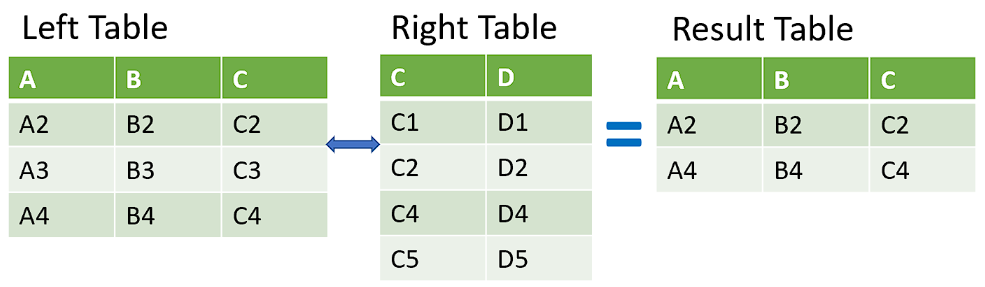

### Musical Dataset
- from an online music streaming service

**Dataset 1**
- table of song genres
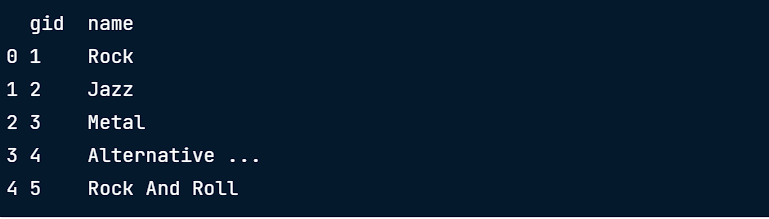

**Dataset 2**
- table of top-rated song tracks
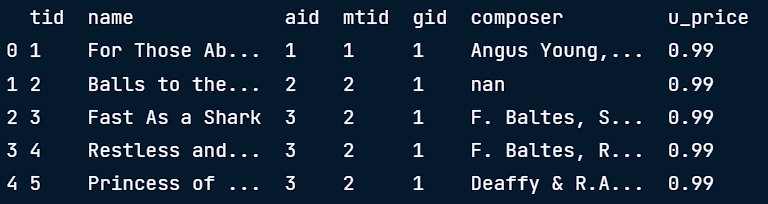

##### Step 1 - semi join
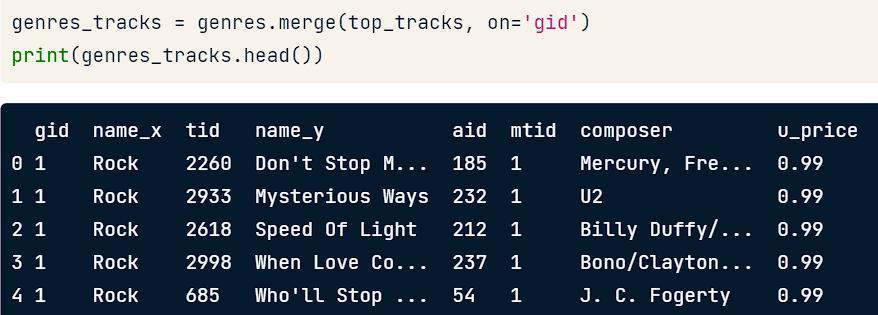

##### Step 2 
- uses `.isin()` which compares every 'gid' in the genres table to the 'gid' in the genres_tracks table
- will say if our genre appears in the merged genres_trakcs table
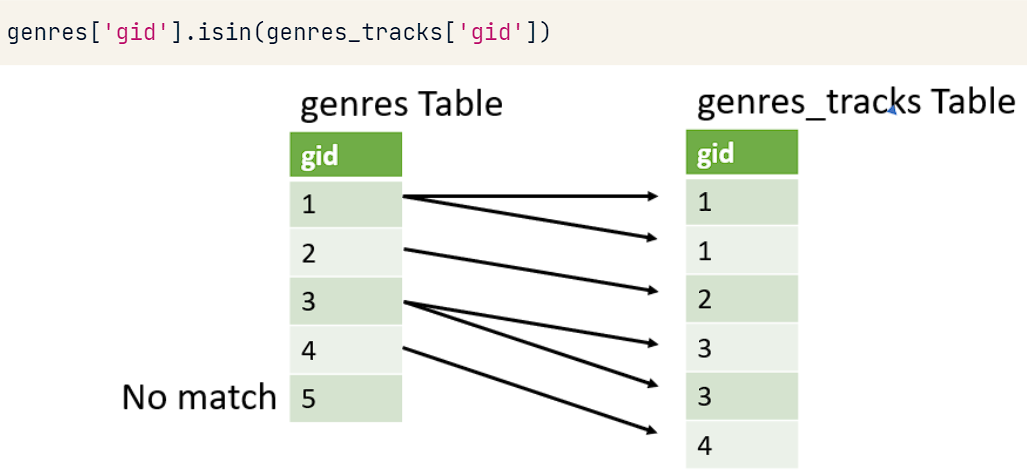

### Filtering Joins

##### Step 3
- these are rows in the genres table that are also found in the top_tracks table
- called a filtering join, we've filtered the genres table by what's in the top_tracks table.
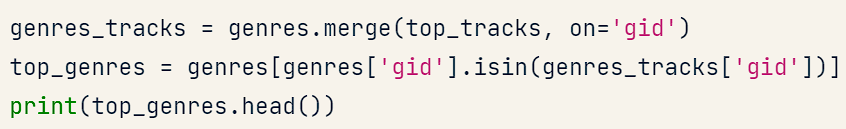
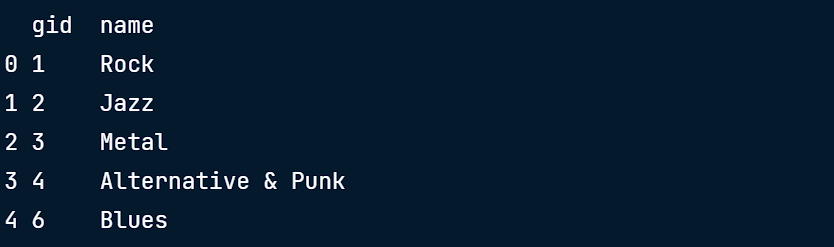

### Anti Joins
- returns the observations in the left table that do not have a matching observation in the right table
- returns only columns from the left table and **not** the right

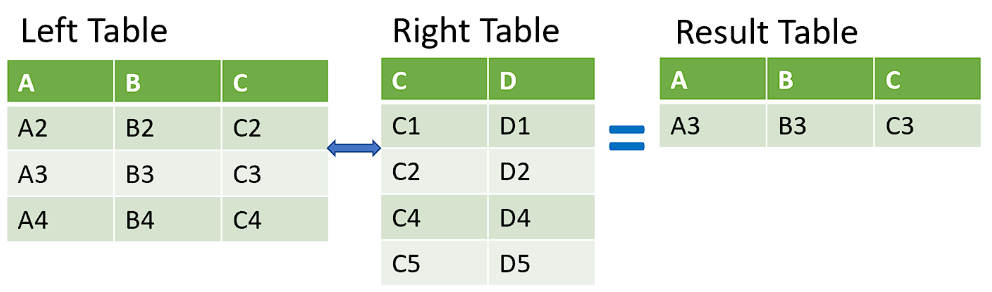

**Objective:** Find which genres are not with an anti join.

##### Step 1
- use a left join returning all of the rows from the left table
- uses `indicator = True` which means the merge method adds a column called `"_merge"` to the output
    - this column tells the source of each row

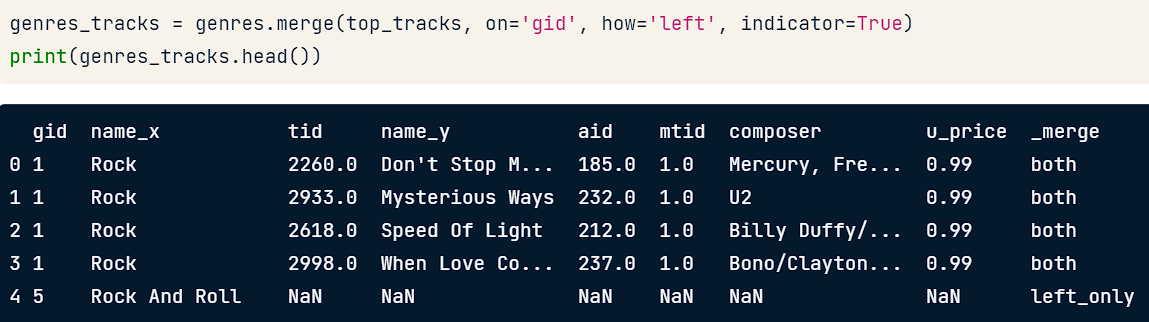
- First 4 rows found a match in both tables, whereas the 5th row can only be found in the left table


##### Step 2
- use a `loc` accessor and `_merge` column to select the rows that only appeared in the left table and return only the `gid` column from the `genres_tracks` table

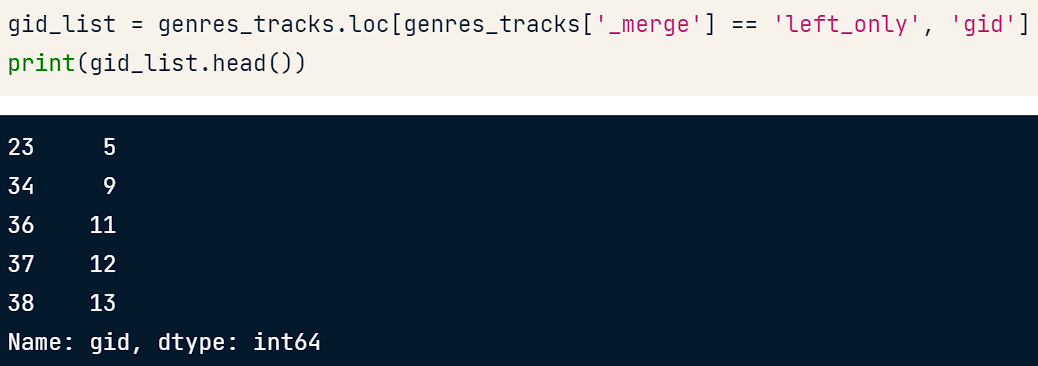
- list of gids not in the tracks table

**Steps of a semi join**

In the last video, you were shown how to perform a semi join with pandas. In this exercise, you'll solidify your understanding of the necessary steps. Recall that a semi join filters the left table to only the rows where a match exists in both the left and right tables.

- Sort the steps in the correct order of the technique shown to perform a semi join in pandas.

**Answer:**
1. Merge the left and right tables on key column using an inner join.
2. Search if the key column in the left table is in the merged tables using the `.isin()` method creating a Boolean Series.
3. Subset the rows of the left table.

> It first merges the tables, then searches it for which rows belong in the final result creating a filter and subsets the left table with that filter.

**Performing an anti join**

In our music streaming company dataset, each customer is assigned an employee representative to assist them. In this exercise, filter the employee table by a table of top customers, returning only those employees who are not assigned to a customer. The results should resemble the results of an anti join. The company's leadership will assign these employees additional training so that they can work with high valued customers.

*No `top_cust` and `employees` datasets provided.*

- Merge `employees` and `top_cust` with a left join, setting `indicator` argument to `True`. Save the result to `empl_cust`.

In [ ]:
# Merge employees and top_cust
empl_cust = employees.merge(top_cust, on = 'srid', 
                            how = 'left', indicator = True)

- Select the `srid` column of `empl_cust` and the rows where `_merge` is `'left_only'`. Save the result to `srid_list`.

In [ ]:
# Select the srid column where _merge is left_only
srid_list = empl_cust.loc[empl_cust['_merge'] == 'left_only', 'srid']

- Subset the `employees` table and select those rows where the `srid` is in the variable `srid_list` and print the results.

In [ ]:
# Get employees not working with top customers
print(employees[employees['srid'].isin(srid_list)])

> You performed an anti join by first merging the tables with a left join, selecting the ID of those employees who did not support a top customer, and then subsetting the original employee's table. From that, we can see that there are five employees not supporting top customers. Anti joins are a powerful tool to filter a main table (i.e. employees) by another (i.e. customers).

**Performing a semi join**

Some of the tracks that have generated the most significant amount of revenue are from TV-shows or are other non-musical audio. You have been given a table of invoices that include top revenue-generating items. Additionally, you have a table of non-musical tracks from the streaming service. In this exercise, you'll use a semi join to find the top revenue-generating non-musical tracks..

The tables `non_mus_tcks`, `top_invoices`, and `genres` have been loaded for you.

- Merge `non_mus_tcks` and `top_invoices` on `tid` using an inner join. Save the result as `tracks_invoices`.
- Use `.isin()` to subset the rows of `non_mus_tck` where `tid` is in the `tid` column of `tracks_invoices`. Save the result as `top_tracks`.
- Group `top_tracks` by `gid` and count the `tid` rows. Save the result to `cnt_by_gid`.
- Merge `cnt_by_gid` with the `genres` table on `gid` and print the result.

In [ ]:
# Merge the non_mus_tck and top_invoices tables on tid
tracks_invoices = non_mus_tcks.merge(top_invoices, on = 'tid')

# Use .isin() to subset non_mus_tcks to rows with tid in tracks_invoices
top_tracks = non_mus_tck[non_mus_tcks['tid'].isin(tracks_invoices['tid'])]

# Group the top_tracks by gid and count the tid rows
cnt_by_gid = top_tracks.groupby(['gid'], as_index = False).agg({'tid': 'count'})

# Merge the genres table to cnt_by_gid on gid and print
print(cnt_by_gid.merge(genres, on = 'gid'))

> In this exercise, you replicated a semi join to filter the table of tracks by the table of invoice items to find the top revenue non-musical tracks. With some additional data manipulation, you discovered that 'TV-shows' is the non-musical genre that has the most top revenue-generating tracks.
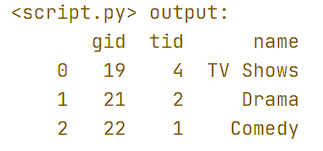

### Concatenate DataFrames together vertically

- pandas `.concat()` method can concatenate both vertical and horizontal
    - `axis = 0`, vertical, default

#### Basic concatenation 
- 3 tables
- same column names
- table variable names:
    - `inv_jan` (top)
    - `inv_feb` (middle)
    - `inv_mar` (bottom)

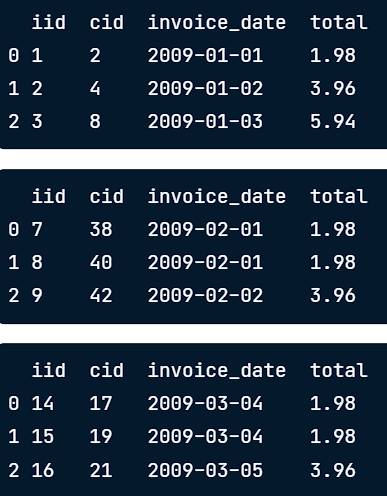
- Three separate tables of invoice data from the streaming service.

- Data from different periods of time will come in multiple tables, to analyze it together, it is needed to combine them into one.

*No datasets provided.*

### Basic Concatenation
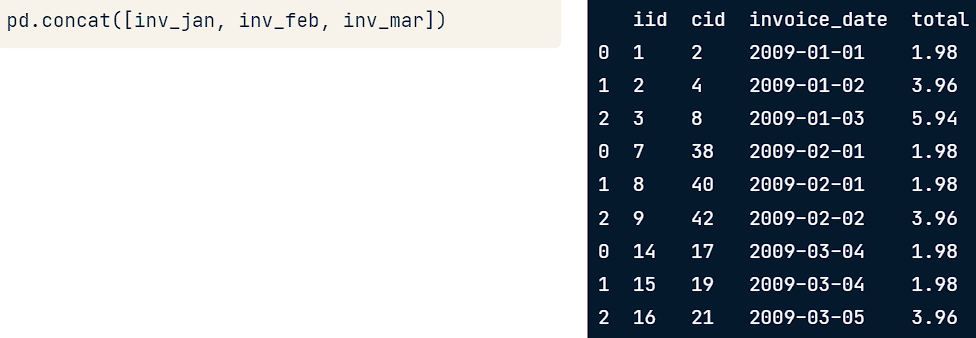

### Ignoring the index
- if the index contains no valuable information
- **result:** the index will go from 0 to n-1
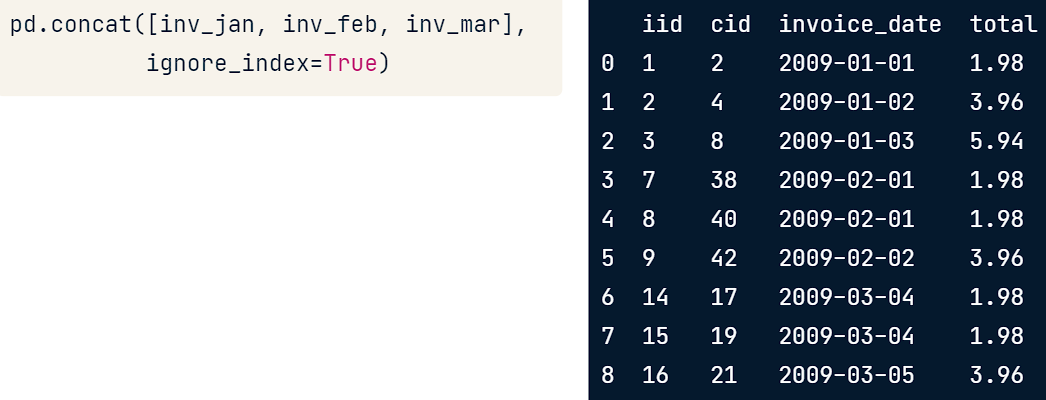

### Setting labels to original tables
- **objective:** associate specific keys with each of the pieces of the three original tables
- provide a list of labels to they keys argument
- make sure that `ignore_index` is set to False, since you can't add a key and ignore the index at the same time

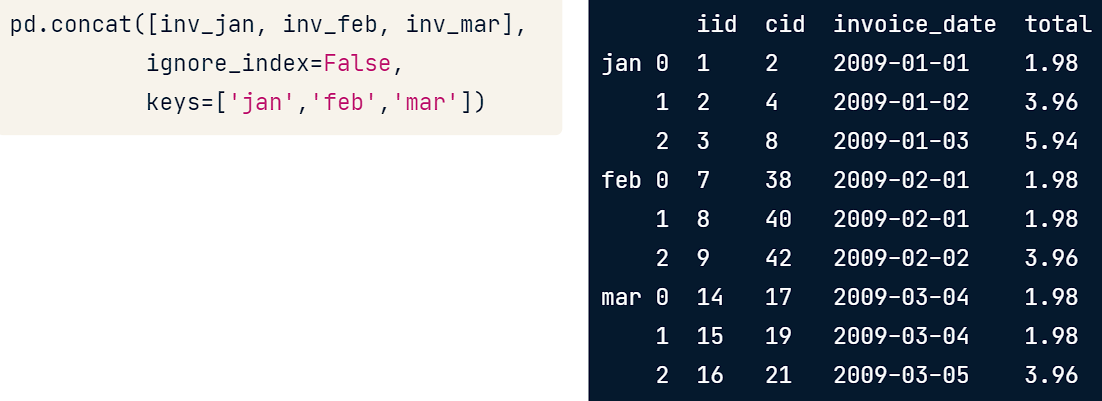
- the result is a table with multi-index, with the label on the first level

### Concatenate tables with different column names
- default concat: outer - it will include all of the columns
- the `concat` method by default will include all of the columns in the different tables it's combining
- the `sort` argument if true, will alphaetically sort the different column names in the result

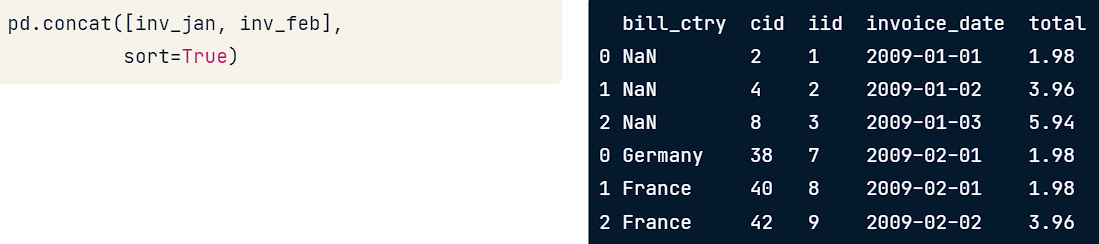
- the result that the billing country for January invoices is NaN altho, there are values for February invoices

----
- To display matching columns between tables only, set the join argument to inner
- sort argument has no effect when join equals inner
- the order of the columns will be the same as the input tables
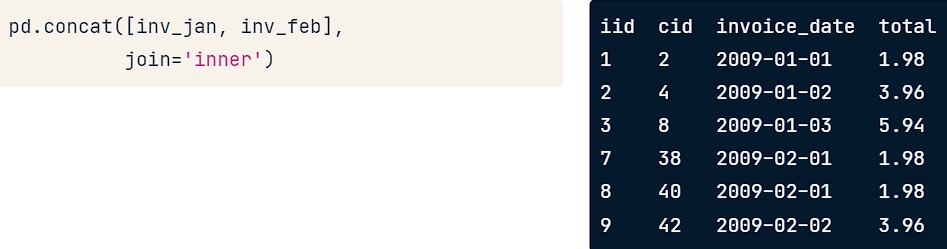

#### Using append method

`.append()`
- simplified version of `.concat()` method
- supports: `ignore_index` and `sort` arguments
- does not support: `keys` and `join`
    - always `join = outer`
    
##### Append these tables
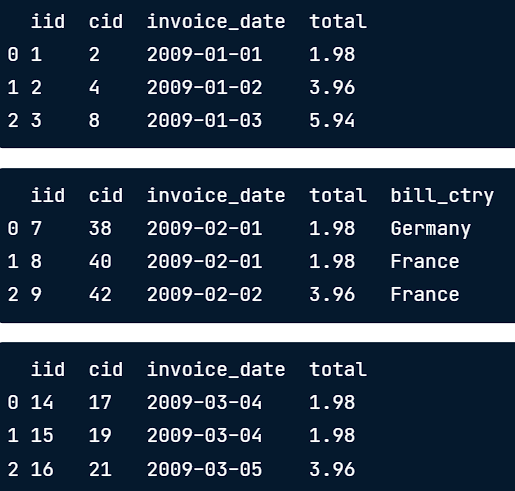

**Steps**
1. list the first table then call the method
2. add the other tables as a list
3. set the ignore_index 
4. sort arguments

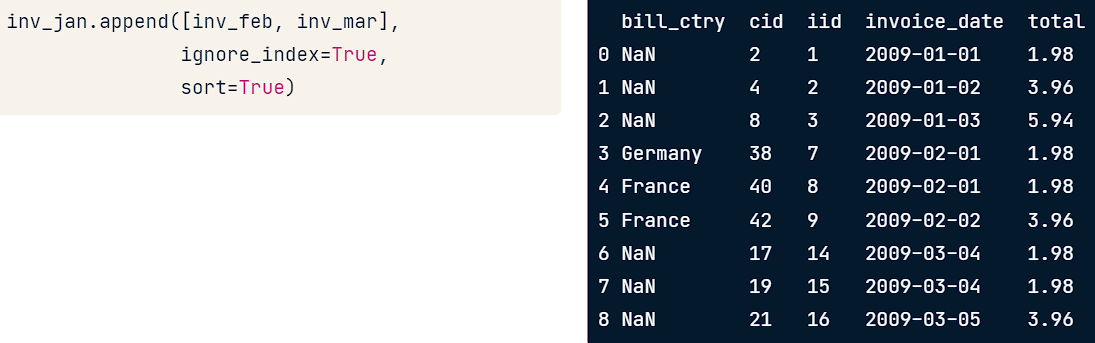
- Except for February, there are null values for the billing country
- the index is adjusted as expected

***

**Concatenation basics**

You have been given a few tables of data with musical track info for different albums from the metal band, Metallica. The track info comes from their Ride The Lightning, Master Of Puppets, and St. Anger albums. Try various features of the .concat() method by concatenating the tables vertically together in different ways.

The tables `tracks_master`, `tracks_ride`, and `tracks_st` have loaded for you.

- Concatenate `tracks_master`, `tracks_ride`, and `tracks_st`, in that order, setting `sort` to `True`.

In [ ]:
# Concatenate the tracks
tracks_from_albums = pd.concat([tracks_master,tracks_ride, tracks_st],
                               sort = True)
print(tracks_from_albums)

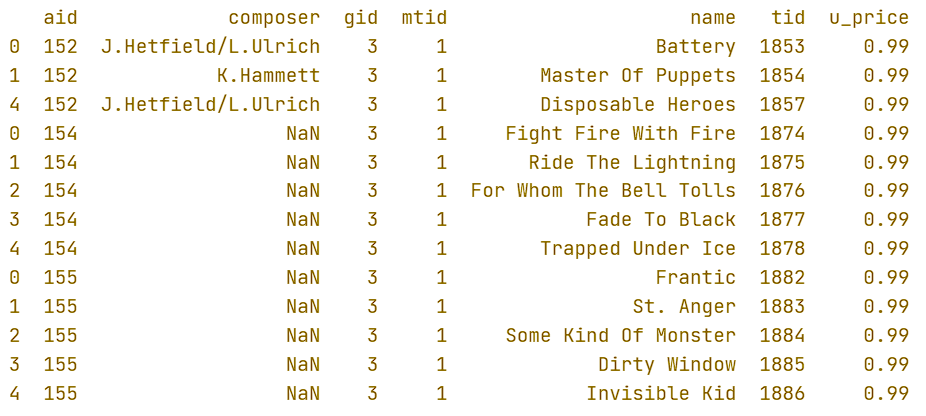

- Concatenate `tracks_master`, `tracks_ride`, and `tracks_st`, where the index goes from 0 to n-1.

In [ ]:
# Concatenate the tracks so the index goes from 0 to n-1
tracks_from_albums = pd.concat([tracks_master,tracks_ride, tracks_st],
                               ignore_index = True,
                               sort = True)
print(tracks_from_albums)

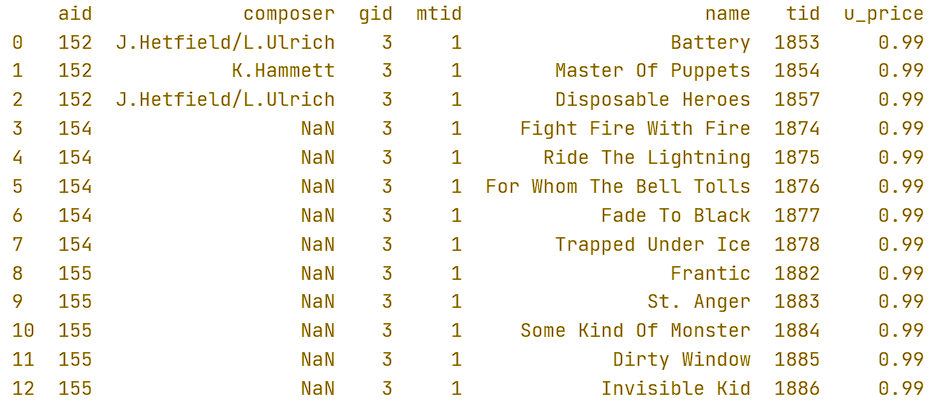

- Concatenate `tracks_master`, `tracks_ride`, and `tracks_st`, showing only columns that are in all tables.

In [ ]:
# Concatenate the tracks, show only columns names that are in all tables
tracks_from_albums = pd.concat([tracks_master,tracks_ride, tracks_st],
                               join = 'inner',
                               sort = True)
print(tracks_from_albums)

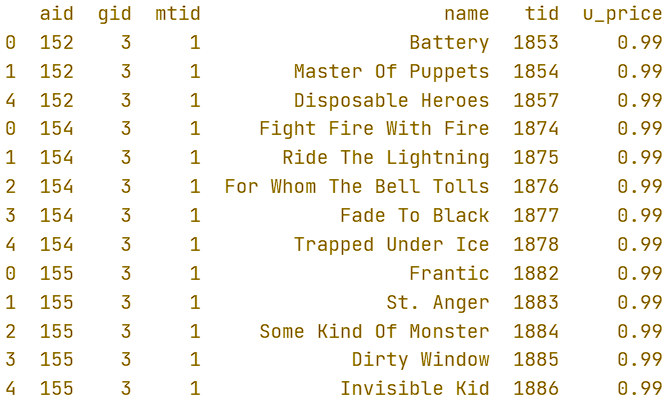

**Concatenating with keys**

The leadership of the music streaming company has come to you and asked you for assistance in analyzing sales for a recent business quarter. They would like to know which month in the quarter saw the highest average invoice total. You have been given three tables with invoice data named `inv_jul`, `inv_aug`, and `inv_sep`. Concatenate these tables into one to create a graph of the average monthly invoice total.

- Concatenate the three tables together vertically in order with the oldest month first, adding `'7Jul'`, `'8Aug'`, and `'9Sep'` as `keys` for their respective months, and save to variable `avg_inv_by_month`.
- Use the `.agg()` method to find the average of the `total` column from the grouped invoices.
- Create a bar chart of `avg_inv_by_month`.

In [ ]:
# Concatenate the tables and add keys
inv_jul_thr_sep = pd.concat([inv_jul, inv_aug, inv_sep], 
                            keys = ['7Jul', '8Aug', '9Sep'])

# Group the invoices by the index keys and find avg of the total column
avg_inv_by_month = inv_jul_thr_sep.groupby(level = 0).agg({'total': 'mean'})

# Bar plot of avg_inv_by_month
avg_inv_by_month.plot(kind = 'bar')
plt.show()

> There are many ways to write code for this task. However, concatenating the tables with a key provides a hierarchical index that can be used for grouping. Once grouped, you can average the groups and create plots. You were able to find out that September had the highest average invoice total.
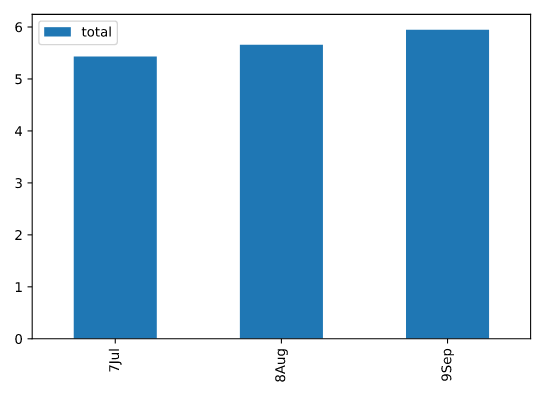

**Using the append method**

The `.concat()` method is excellent when you need a lot of control over how concatenation is performed. However, if you do not need as much control, then the `.append()` method is another option. You'll try this method out by appending the track lists together from different Metallica albums. From there, you will merge it with the `invoice_items` table to determine which track sold the most.

The tables `tracks_master`, `tracks_ride`, `tracks_st`, and `invoice_items` have loaded for you.

- Use the `.append()` method to combine (**in this order**) `tracks_ride`, `tracks_master`, and `tracks_st` together vertically, and save to` metallica_tracks`.
- Merge `metallica_tracks` and `invoice_items` on `tid` with an inner join, and save to `tracks_invoices`.
- For each `tid` and `name` in `tracks_invoices`, sum the quantity sold column, and save as `tracks_sold`.
- Sort `tracks_sold` in descending order by the `quantity` column, and print the table.

In [ ]:
# Use the .append() method to combine the tracks tables
metallica_tracks = tracks_ride.append([tracks_master, tracks_st], sort = False)

# Merge metallica_tracks and invoice_items
tracks_invoices = metallica_tracks.merge(invoice_items, on = 'tid', how = 'inner')

# For each tid and name sum the quantity sold
tracks_sold = tracks_invoices.groupby(['tid','name']).agg({'quantity': 'sum'})

# Sort in decending order by quantity and print the results
print(tracks_sold.sort_values(['quantity'], ascending = False))

> It looks like Battery, and For Whom The Bell Tolls were the most sold tracks.
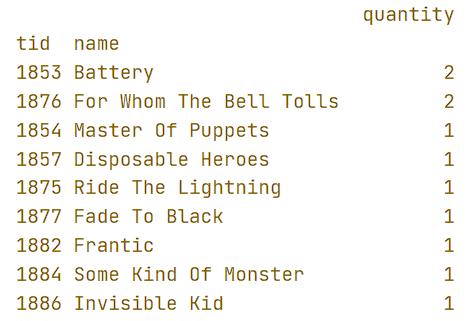

### Verifying integrity

##### Possible merging issues:

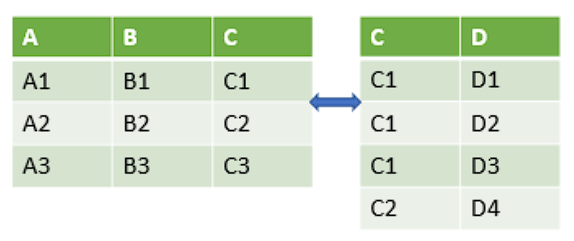
- unintentional one-to-many relationship
- unintentional many-to-many relationship

##### Possible concatenating issue:

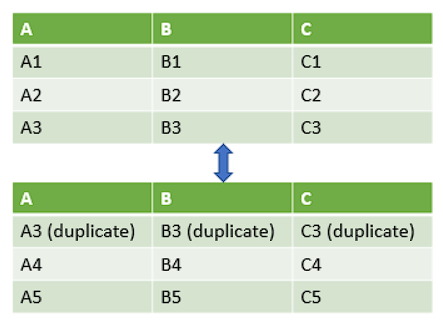
- duplicate records possibly unintentionally introduced if a record exists in both tables

### Validating merges
- will validate the relationship between the two tables
`.merge(validate = None)`

- Checks if merge is of specified type
    - 'one_to_one'
    - 'one_to_many'
    - 'many_to_one'
    - 'many_to_many'

**Scenario:** If it is specified to use one-to-one relationship but it turns out the relationship is not one-to-one, then an error is raised.

#### Merge dataset for example
- each track should have one set of specification, so this should be a one-to-one merge
- **Observation:** The `specs` table has 2 rows with a 'tid' value equal to 2. Merging the two tables now becomes, unintentionally, a one-to-many relationship.
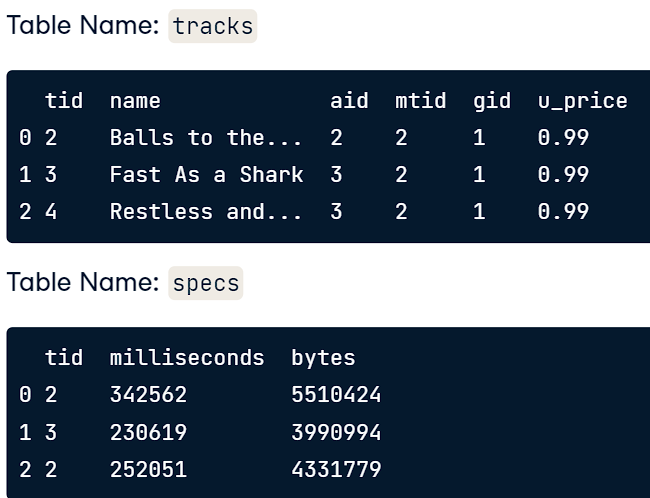

#### Merge validate: one-to-one

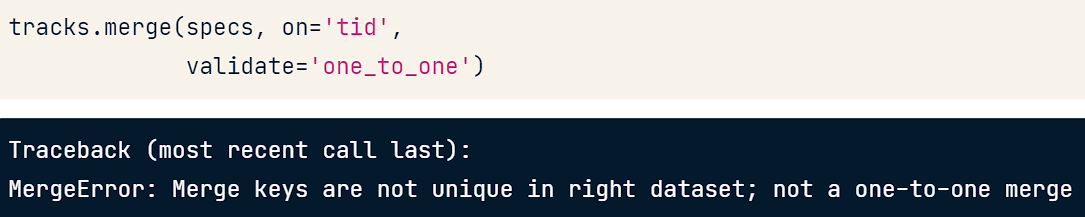

#### Merge validate: one-to-many

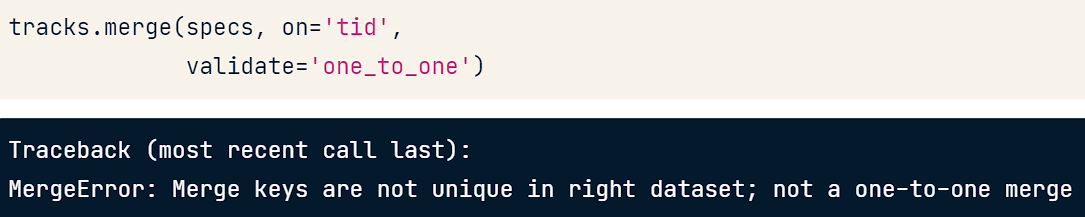

### Verifying concatenations

`.concat(verify_integrity = False)`
- check whether the new concatenated index contains duplicates
- default value: False
- if set to True, it will check if there are duplicate values in the index and raise an error if there are
    - will only check the index values and not the columns


##### February and March invoice dataset

**Verify_integrity = True**
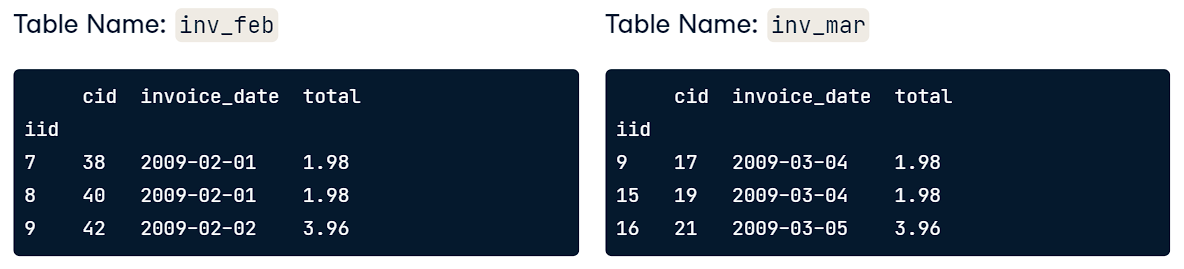
- The concat method raises a `ValueError` stating that the indexes have overlapping values

**Verify_integrity = False**
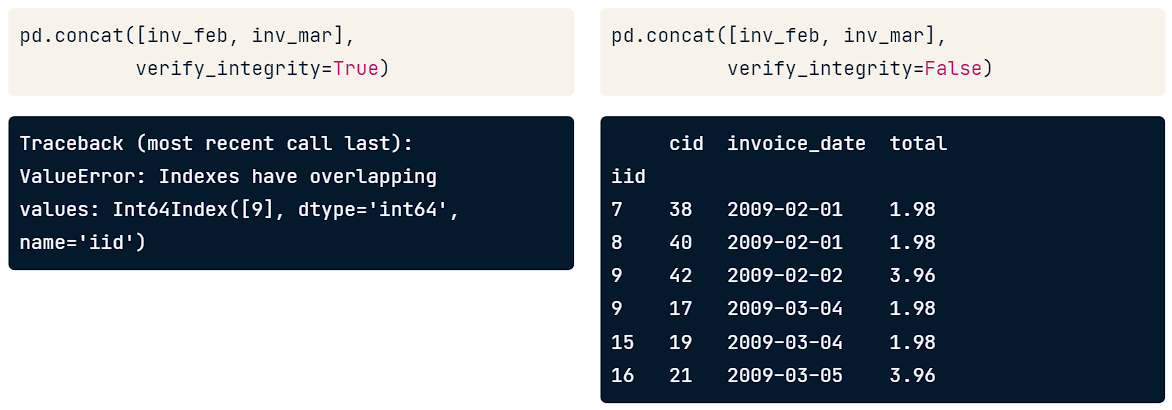
- The concat method returns a combined table with the invoice ID #9 repeated twice.

### Why verify integrity and what to do
- real world data is often ***NOT*** clean
    - it may bot be evident if data has the expected structure

**What to do?**
- Fix incorrect data
- Drop duplicate rows


> verifying is useful for saving us from having a mean skewed by duplicate values, or from creating inaccurate plots

**Concatenate and merge to find common songs**

The senior leadership of the streaming service is requesting your help again. You are given the historical files for a popular playlist in the classical music genre in 2018 and 2019. Additionally, you are given a similar set of files for the most popular pop music genre playlist on the streaming service in 2018 and 2019. Your goal is to concatenate the respective files to make a large classical playlist table and overall popular music table. Then filter the classical music table using a semi join to return only the most popular classical music tracks.

- Concatenate the `classic_18` and `classic_19` tables vertically where the index goes from 0 to n-1, and save to `classic_18_19`.
- Concatenate the `pop_18` and `pop_19` tables vertically where the index goes from 0 to n-1, and save to `pop_18_19`.

In [ ]:
# Concatenate the classic tables vertically
classic_18_19 = pd.concat([classic_18, classic_19], ignore_index = True)

# Concatenate the pop tables vertically
pop_18_19 = pd.concat([pop_18, pop_19], ignore_index = True)

In [ ]:
# Concatenate the classic tables vertically
classic_18_19 = pd.concat([classic_18, classic_19], ignore_index=True)

# Concatenate the pop tables vertically
pop_18_19 = pd.concat([pop_18, pop_19], ignore_index=True)

# Merge classic_18_19 with pop_18_19
classic_pop = classic_18_19.merge(pop_18_19, on = 'tid')

# Using .isin(), filter classic_18_19 rows where tid is in classic_pop
popular_classic = classic_18_19[classic_18_19['tid'].isin(classic_pop['tid'])]

# Print popular chart
print(popular_classic)

---

# [4] Merging Ordered and Time-Series Data

In this final chapter, you’ll step up a gear and learn to apply pandas' specialized methods for merging time-series and ordered data together with real-world financial and economic data from the city of Chicago. You’ll also learn how to query resulting tables using a SQL-style format, and unpivot data using the melt method.

### using merge_ordered()
- can merge time-series and other ordered data 
- allows to merge the left and right tables, merged on the "C" column
- the results are similar to the standard merge method with an outer join, only that the results are sorted
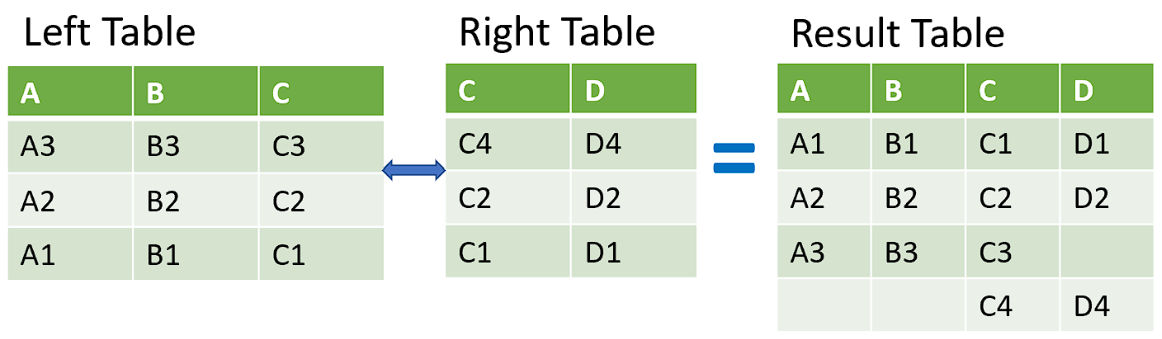

### Method Comparison

#### .merge() method:
- column(s) to join on
    - `on`, `left_on`, and `right_on`
- supports different types of join
    - `how` *(left, right, inner, outer){@}}* 
    - **default** inner
- overlapping column names
    - suffixes
- calling the method
    - `df1.merger(df2`

#### .merge_ordered() method:
- column(s) to join on
    - `on`, `left_on`, and `right_on`
- supports different types of join
    - `how` *(left, right, inner, outer)* 
    - **default** outer
- overlapping column names
    - suffixes
- calling the function
    - `pd.merge_ordered(df1, df2)`

##### Financial Dataset
- financial, macroeconomic, and stock market data
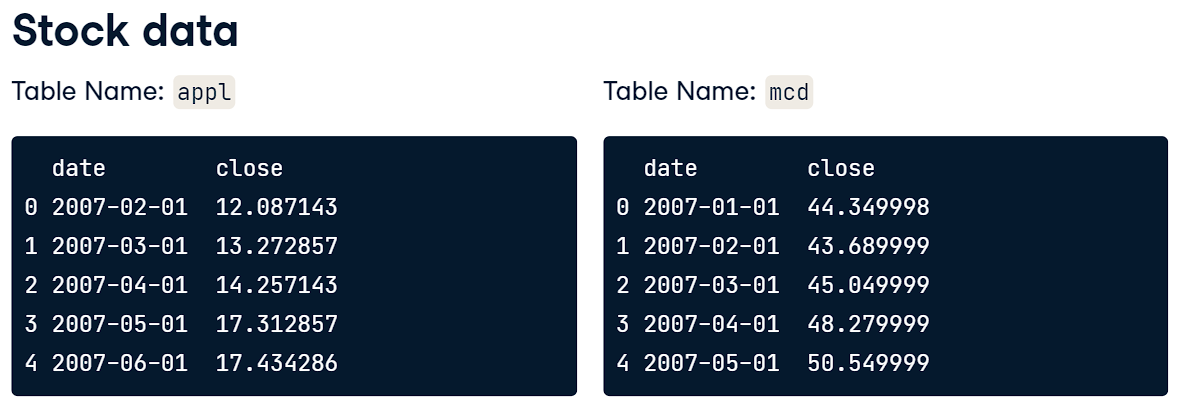

- first arguments are left and right tables
- setting the suffixes argument to determine which table the data originated

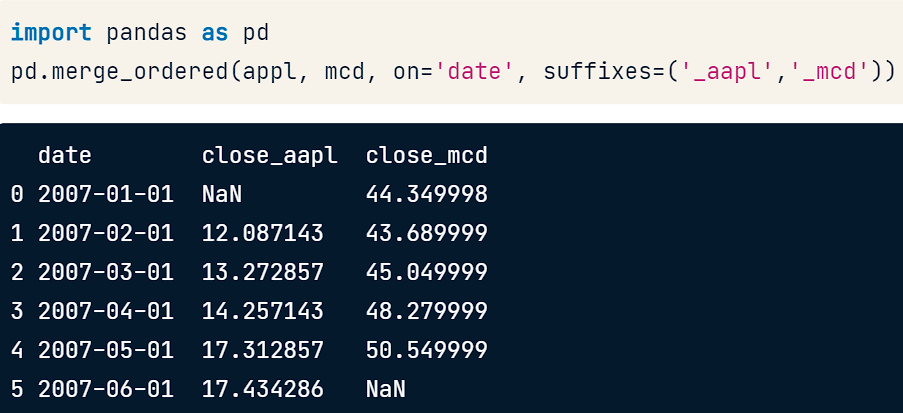
- no values for Apple in January or a value for McDonald's for June since values for these time periods are not available in the two original tables

#### Forward Fill
- fill missing data using this technique
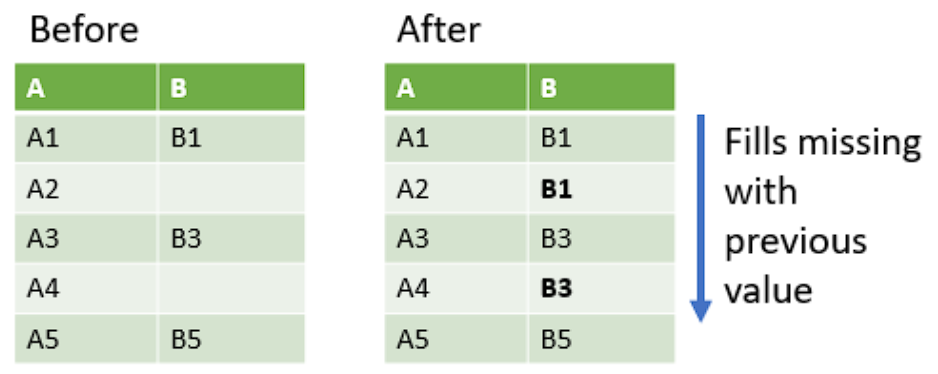

#### Example
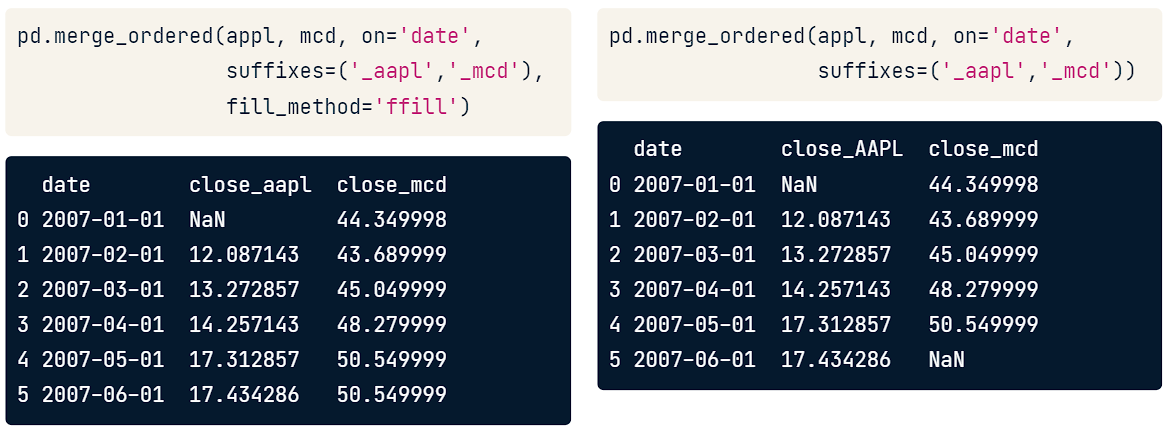

#### When to use merge_ordered()?
- ordered data / time series
- filling in missing values

**Correlation between GDP and S&P500**

In this exercise, you want to analyze stock returns from the S&P 500. You believe there may be a relationship between the returns of the S&P 500 and the GDP of the US. Merge the different datasets together to compute the correlation.

Two tables have been provided for you, named `sp500`, and `gdp`.

- Use `merge_ordered()` to merge `gdp` and `sp500` using a left join on `year` and `date`. Save the results as `gdp_sp500`.
- Print `gdp_sp500` and look at the returns for the year 2018.

In [1]:
import pandas as pd
import numpy as np

In [2]:
sp500 = pd.read_csv('datasets/S&P500.csv')
gdp = pd.read_csv('datasets/WorldBank_GDP.csv')

In [4]:
sp500.head()

Date  Returns
0  2008   -38.49
1  2009    23.45
2  2010    12.78
3  2011     0.00
4  2012    13.41

In [5]:
gdp.head()

Country Name Country Code     Indicator Name  Year           GDP
0          China          CHN  GDP (current US$)  2010  6.087160e+12
1        Germany          DEU  GDP (current US$)  2010  3.417090e+12
2          Japan          JPN  GDP (current US$)  2010  5.700100e+12
3  United States          USA  GDP (current US$)  2010  1.499210e+13
4          China          CHN  GDP (current US$)  2011  7.551500e+12

In [ ]:
# Use merge_ordered() to merge gdp and sp500 on year and date
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on = 'year', right_on = 'date', 
                             how = 'left')

# Print gdp_sp500
print(gdp_sp500)

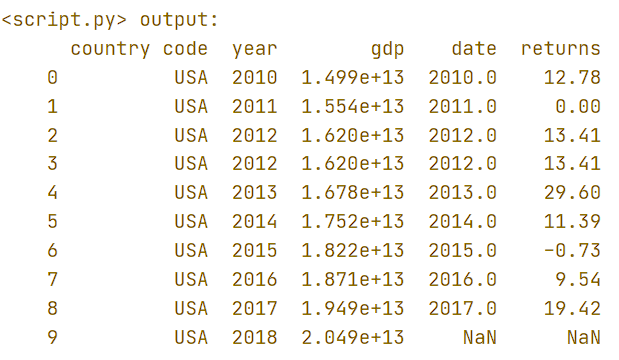

- Use `merge_ordered()`, again similar to before, to merge `gdp` and `sp500` use the function's ability to interpolate missing data to forward fill the missing value for returns, assigning this table to the variable `gdp_sp500`.

In [ ]:
# Use merge_ordered() to merge gdp and sp500, interpolate missing value
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on = 'year', right_on = 'date', how = 'left', fill_method = 'ffill')


# Print gdp_sp500
print (gdp_sp500)

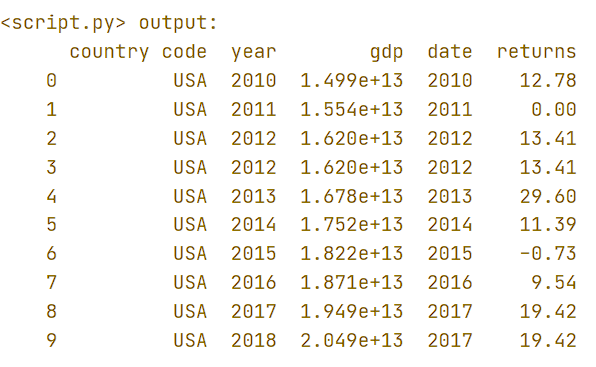

- Subset the `gdp_sp500` table, select the `gdp` and `returns` columns, and save as `gdp_returns`.
- Print the correlation matrix of the `gdp_returns` table.

In [ ]:
# Use merge_ordered() to merge gdp and sp500, interpolate missing value
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on = 'year', right_on = 'date', how = 'left',  fill_method = 'ffill')

# Subset the gdp and returns columns
gdp_returns = gdp_sp500[['gdp', 'returns']]

# Print gdp_returns correlation
print (gdp_returns.corr())

> By using this function, you were able to fill in the missing data from 2019. Finally, the correlation of 0.21 between the GDP and S&P500 is low to moderate at best.
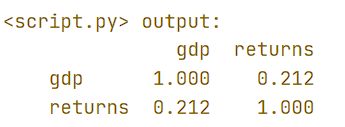

**Phillips curve using merge_ordered()**

There is an economic theory developed by A. W. Phillips which states that inflation and unemployment have an inverse relationship. The theory claims that with economic growth comes inflation, which in turn should lead to more jobs and less unemployment.

You will take two tables of data from the U.S. Bureau of Labor Statistics, containing unemployment and inflation data over different periods, and create a Phillips curve. The tables have different frequencies. One table has a data entry every six months, while the other has a data entry every month. You will need to use the entries where you have data within both tables.

The tables `unemployment` and `inflation` have been loaded for you.

- Use `merge_ordered()` to merge the `inflation` and `unemployment` tables on `date` with an inner join, and save the results as `inflation_unemploy`.
- Print the `inflation_unemploy` variable.
- Using `inflation_unemploy`, create a scatter plot with `unemployment_rate` on the horizontal axis and `cpi` (inflation) on the vertical axis.

In [ ]:
# Use merge_ordered() to merge inflation, unemployment with inner join
inflation_unemploy = pd.merge_ordered(inflation, unemployment, how = 'inner', on = 'date')

# Print inflation_unemploy 
print(inflation_unemploy)

# Plot a scatter plot of unemployment_rate vs cpi of inflation_unemploy
inflation_unemploy.plot(kind = 'scatter', x = 'unemployment_rate', y = 'cpi')
plt.show()

> You created a Phillips curve. There are critics of the curve, but what is more important in this example is that you were able to use entries where you had entries in both tables by using an inner join. You might ask why not use the default outer join and use forward fill to fill to estimate the missing variables. You might choose differently. In this case, instead of showing an estimated unemployment rate (which is a continually changing measure) for five periods, that data was dropped from the plot.
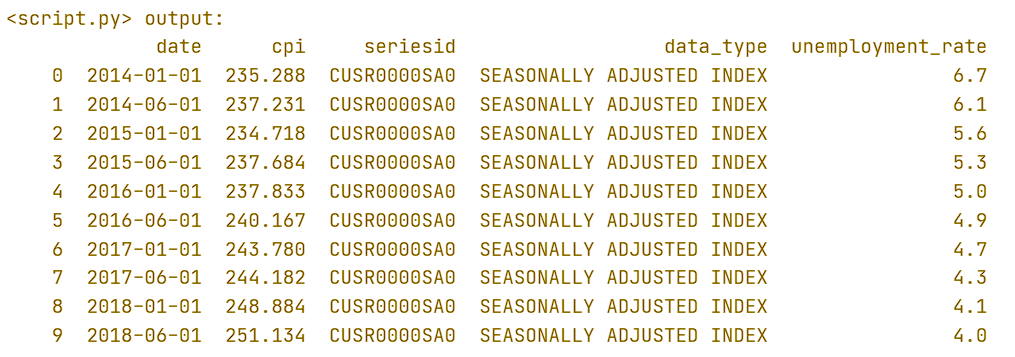
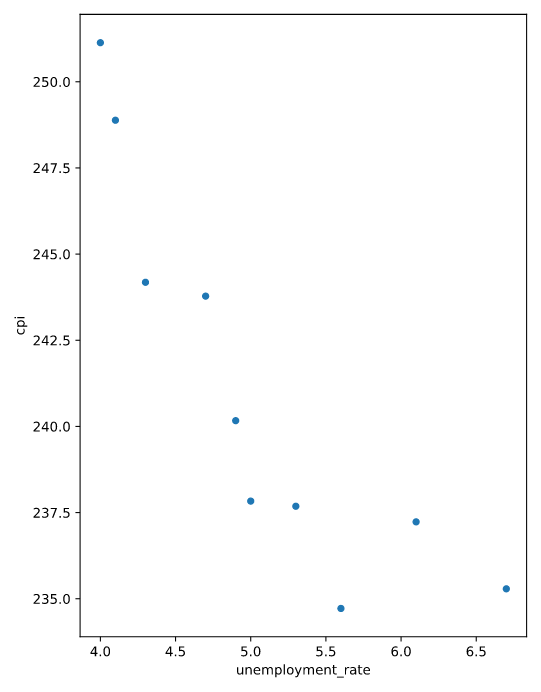

**merge_ordered() caution, multiple columns**

When using `merge_ordered()` to merge on multiple columns, the order is important when you combine it with the forward fill feature. The function sorts the merge on columns in the order provided. In this exercise, we will merge GDP and population data from the World Bank for the Australia and Sweden, reversing the order of the merge on columns. The frequency of the series are different, the GDP values are quarterly, and the population is yearly. Use the forward fill feature to fill in the missing data. Depending on the order provided, the fill forward will use unintended data to fill in the missing values.

The tables `gdp` and `pop` have been loaded.

- Use `merge_ordered()` on `gdp` and `pop`, merging on columns `date` and `country` with the fill feature, save to `ctry_date`.

In [ ]:
# Merge gdp and pop on date and country with fill and notice rows 2 and 3
ctry_date = pd.merge_ordered(gdp, pop, on = ['date', 'country'],
                             fill_method = 'ffill')

# Print ctry_date
print(ctry_date)

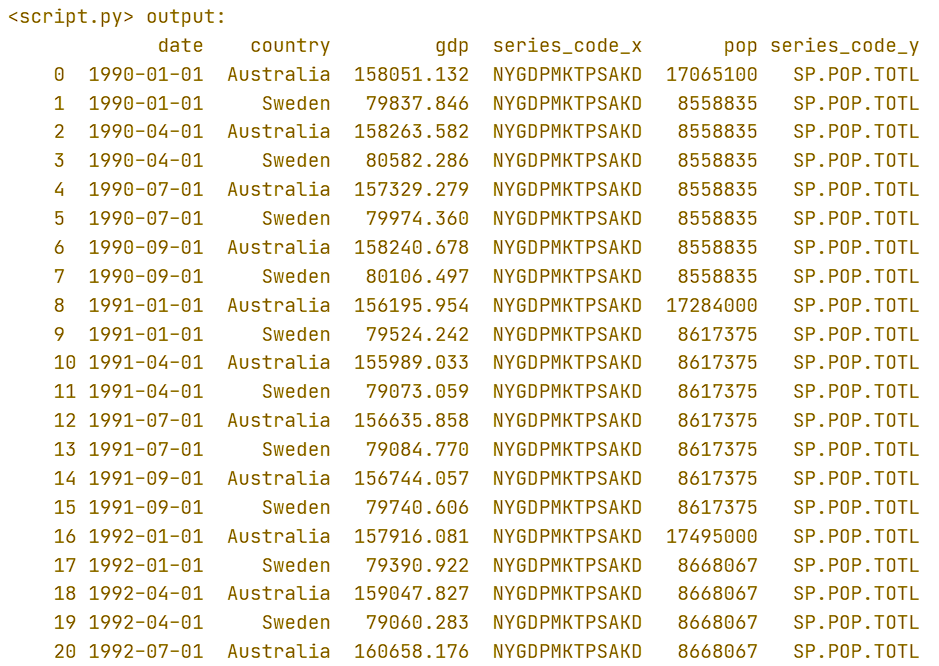

- Perform the same merge of `gdp` and `pop`, but join on `country` and `date` (**reverse of step 1**) with the fill feature, saving this as `date_ctry`.

In [ ]:
# Merge gdp and pop on country and date with fill
date_ctry = pd.merge_ordered(gdp, pop, on = ['country', 'date'], fill_method = 'ffill')

# Print date_ctry
print(date_ctry)

> When you merge on date first, the table is sorted by date then country. When forward fill is applied, Sweden's population value in January is used to fill in the missing values for both Australia and the Sweden for the remainder of the year. This is not what you want. The fill forward is using unintended data to fill in the missing values. However, when you merge on country first, the table is sorted by country then date, so the forward fill is applied appropriately in this situation.
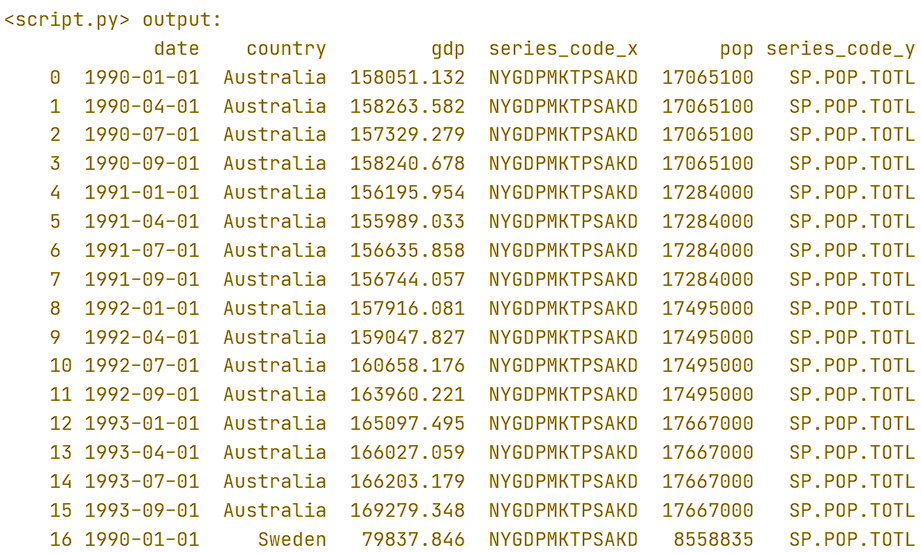

### Using merge_asof()
- similar to an ordered left join
- match on the nnearest key column and not exact matches or rather than equal values
    - merged "on" columns must be sorted
    
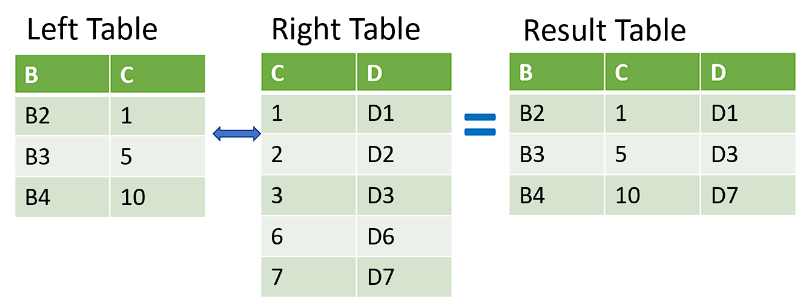
- when merged on column "C", all of the rows from the left table are brought back
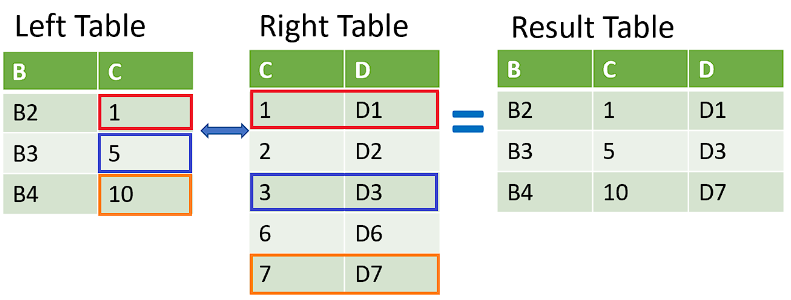
- however, the row selected from the right table is the last row whose "C" value is less than or equal to the "C" value in the left table

### Datasets

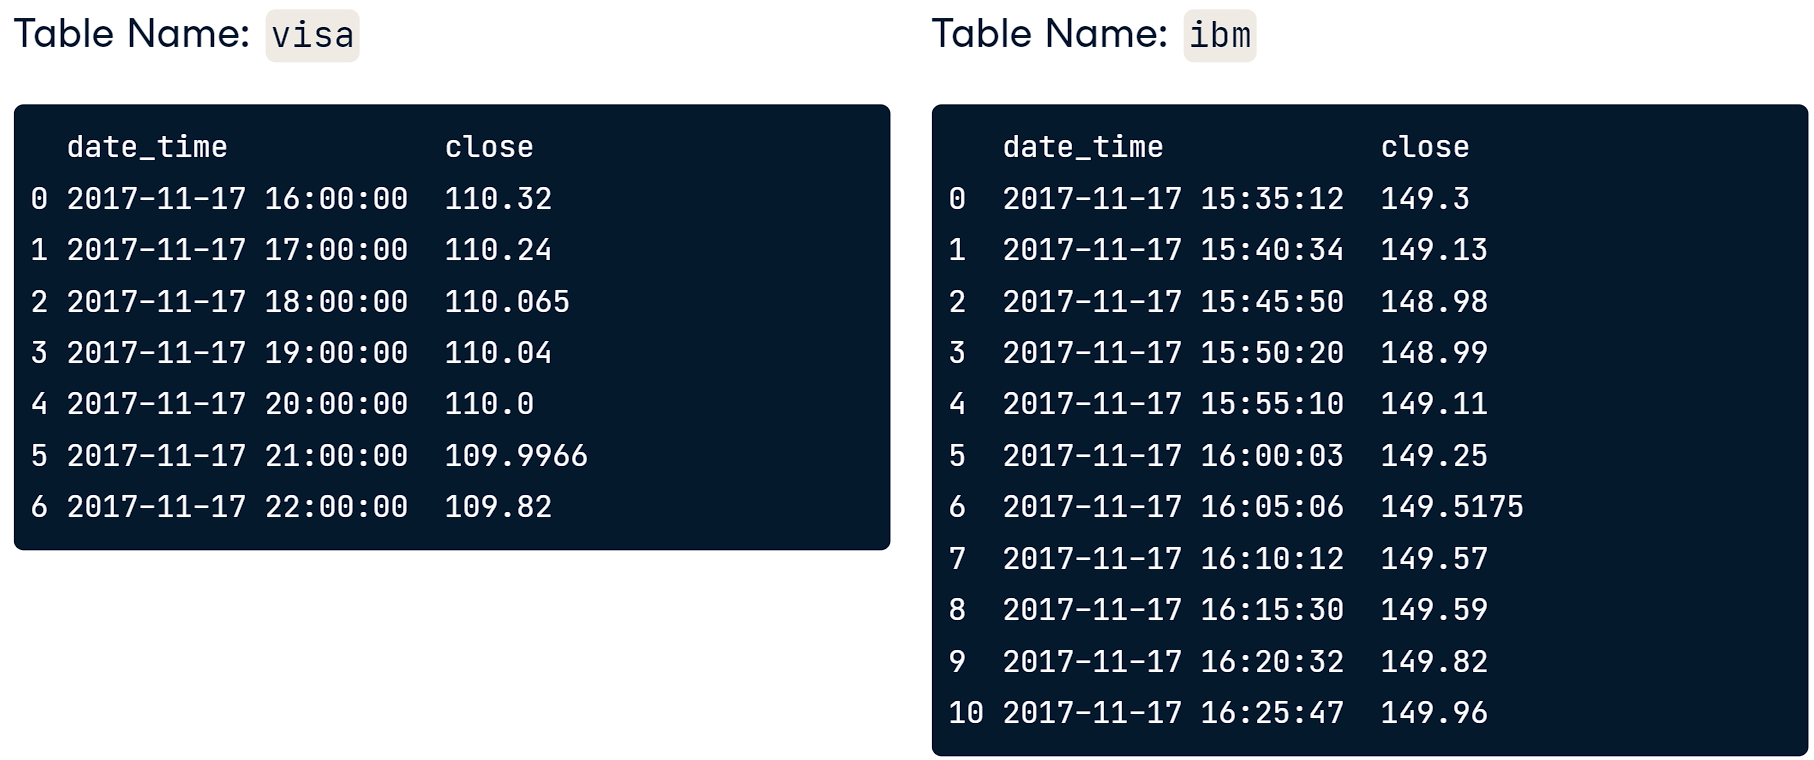

- output similar to left join
- however, the values from the IBM table are based on how close the date_time values match with th Visa table

### merge_asof() example with direction

- `direction` argument - will change the behavior of the method to select the first row in the right tablewhose 'on' key column is greater than or equal to the left's key column
    - default: **backward**
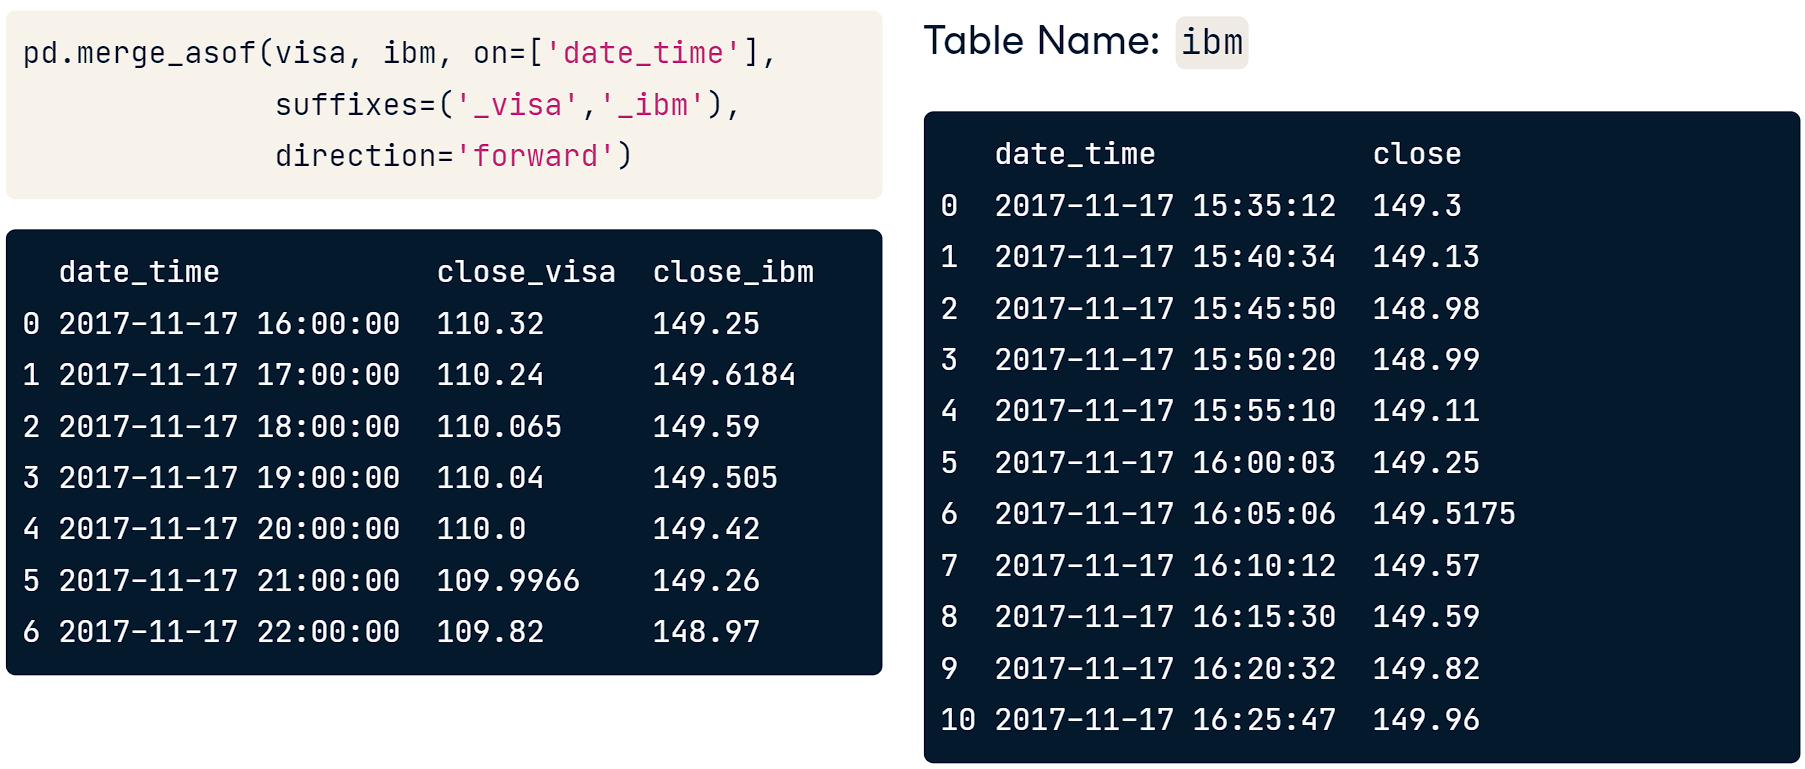

##### When to use merge_asof()
- data sampled from a process
- developing a training set (no data leakage)

---

**Using merge_asof() to study stocks**

You have a feed of stock market prices that you record. You attempt to track the price every five minutes. Still, due to some network latency, the prices you record are roughly every 5 minutes. You pull your price logs for three banks, JP Morgan (JPM), Wells Fargo (WFC), and Bank Of America (BAC). You want to know how the price change of the two other banks compare to JP Morgan. Therefore, you will need to merge these three logs into one table. Afterward, you will use the pandas .diff() method to compute the price change over time. Finally, plot the price changes so you can review your analysis.

The three log files have been loaded for you as tables named jpm, wells, and bac.

- Use merge_asof() to merge jpm (left table) and wells together on the date_time column, where the rows with the nearest times are matched, and with suffixes=('', '_wells'). Save to jpm_wells.
- Use merge_asof() to merge jpm_wells (left table) and bac together on the date_time column, where the rows with the closest times are matched, and with suffixes=('_jpm', '_bac'). Save to jpm_wells_bac.
- Using price_diffs, create a line plot of the close price of JPM, WFC, and BAC only.

In [ ]:
# Use merge_asof() to merge jpm and wells
jpm_wells = pd.merge_asof(jpm, wells, on = 'date_time', 
                          suffixes = ('', '_wells'), direction = 'nearest')

# Use merge_asof() to merge jpm_wells and bac
jpm_wells_bac = pd.merge_asof(jpm_wells, bac, on = 'date_time', 
                              suffixes = ('_jpm', '_bac'), direction = 'nearest')

# Compute price diff
price_diffs = jpm_wells_bac.diff()

# Plot the price diff of the close of jpm, wells and bac only
price_diffs.plot(y = ['close_jpm','close_wells','close_bac'])
plt.show()

> The price change for these bank stocks was roughly the same, although the price change for JP Morgan was more variable. The critical point here is that the merge_asof() function is very useful in performing the fuzzy matching between the timestamps of all the tables.
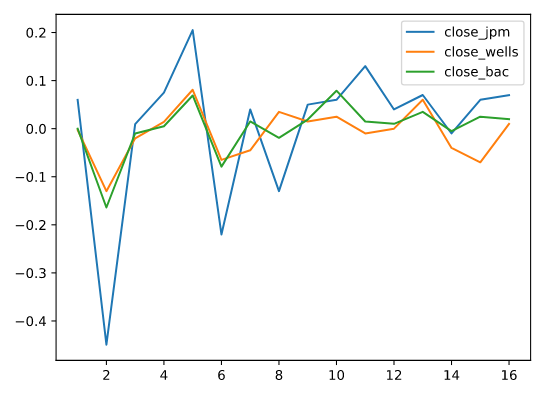

**Using merge_asof() to create dataset**

The merge_asof() function can be used to create datasets where you have a table of start and stop dates, and you want to use them to create a flag in another table. You have been given gdp, which is a table of quarterly GDP values of the US during the 1980s. Additionally, the table recession has been given to you. It holds the starting date of every US recession since 1980, and the date when the recession was declared to be over. Use merge_asof() to merge the tables and create a status flag if a quarter was during a recession. Finally, to check your work, plot the data in a bar chart.

The tables gdp and recession have been loaded for you.

- Using merge_asof(), merge gdp and recession on date, with gdp as the left table. Save to the variable gdp_recession.
- Create a list using a list comprehension and a conditional expression, named is_recession, where for each row if the gdp_recession['econ_status'] value is equal to 'recession' then enter 'r' else 'g'.
- Using gdp_recession, plot a bar chart of gdp versus date, setting the color argument equal to is_recession.

In [ ]:
# Merge gdp and recession on date using merge_asof()
gdp_recession = pd.merge_asof(gdp, recession, on = 'date')

# Create a list based on the row value of gdp_recession['econ_status']
is_recession = ['r' if s == 'recession' else 'g' for s in gdp_recession['econ_status']]

# Plot a bar chart of gdp_recession
gdp_recession.plot(kind = 'bar', y = 'gdp', x = 'date', color = is_recession, rot = 90)
plt.show()

> You can see from the chart that there were a number of quarters early in the 1980s where a recession was an issue. merge_asof() allowed you to quickly add a flag to the gdp dataset by matching between two different dates, in one line of code! If you were to perform the same task using subsetting, it would have taken a lot more code.
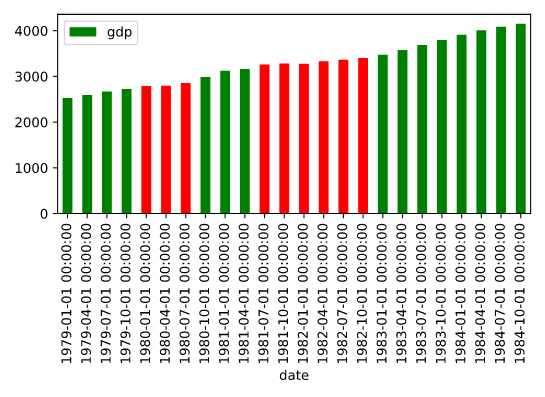

**merge_asof() and merge_ordered() differences**

The merge_asof() and merge_ordered() functions are similar in the type of merge they perform and the input arguments they use. In this exercise, think about how the functions are different.

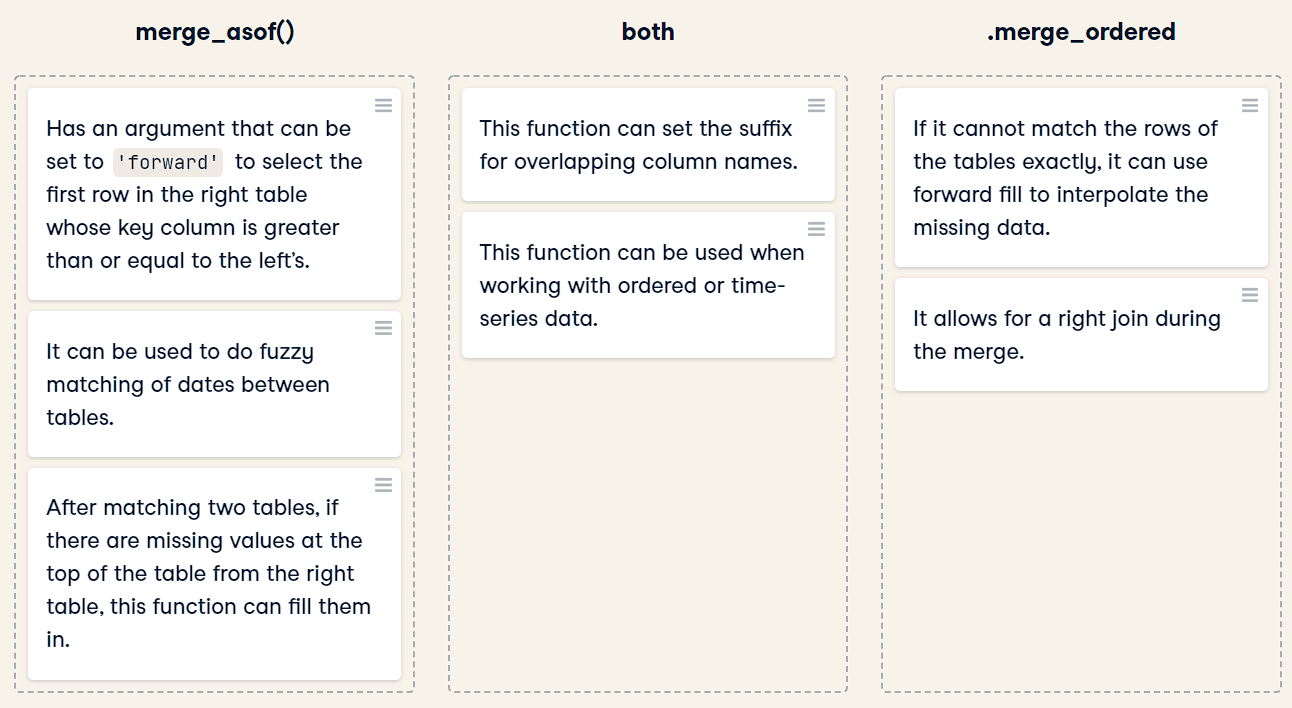

**Explore financials with .query()**

You have been given a table of financial data from some popular social network companies called social_fin. All of the values are in thousands of US dollars.

Use the .query() method and the IPython shell to explore social_fin and select the True statement.

> There are 6 rows where the net income has a negative value.
     To check this answer you needed to select financial equal to net income and value < 0.

**Subsetting rows with .query()**

In this exercise, you will revisit GDP and population data for Australia and Sweden from the World Bank and expand on it using the .query() method. You'll merge the two tables and compute the GDP per capita. Afterwards, you'll use the .query() method to sub-select the rows and create a plot. Recall that you will need to merge on multiple columns in the proper order.

The tables gdp and pop have been loaded for you.

- Use merge_ordered() on gdp and pop on columns country and date with the fill feature, save to gdp_pop and print.

In [ ]:
# Merge gdp and pop on date and country with fill
gdp_pop = pd.merge_ordered(gdp, pop, on = ['country', 'date'], fill_method = 'ffill')

- Add a column named gdp_per_capita to gdp_pop that divides gdp by pop.

In [ ]:
# Add a column named gdp_per_capita to gdp_pop that divides the gdp by pop
gdp_pop['gdp_per_capita'] = gdp_pop['gdp'] / gdp_pop['pop']

- Pivot gdp_pop so values='gdp_per_capita', index='date', and columns='country', save as gdp_pivot.

In [ ]:
# Pivot table of gdp_per_capita, where index is date and columns is country
gdp_pivot = gdp_pop.pivot_table('gdp_per_capita', 'date', 'country')

- Use .query() to select rows from gdp_pivot where date is greater than equal to "1991-01-01". Save as recent_gdp_pop.

In [ ]:
# Select dates equal to or greater than 1991-01-01
recent_gdp_pop = gdp_pivot.query('date >= "1991-01-01"')

# Plot recent_gdp_pop
recent_gdp_pop.plot(rot = 90)
plt.show()

> You can see from the plot that the per capita GDP of Australia passed Sweden in 1992. 
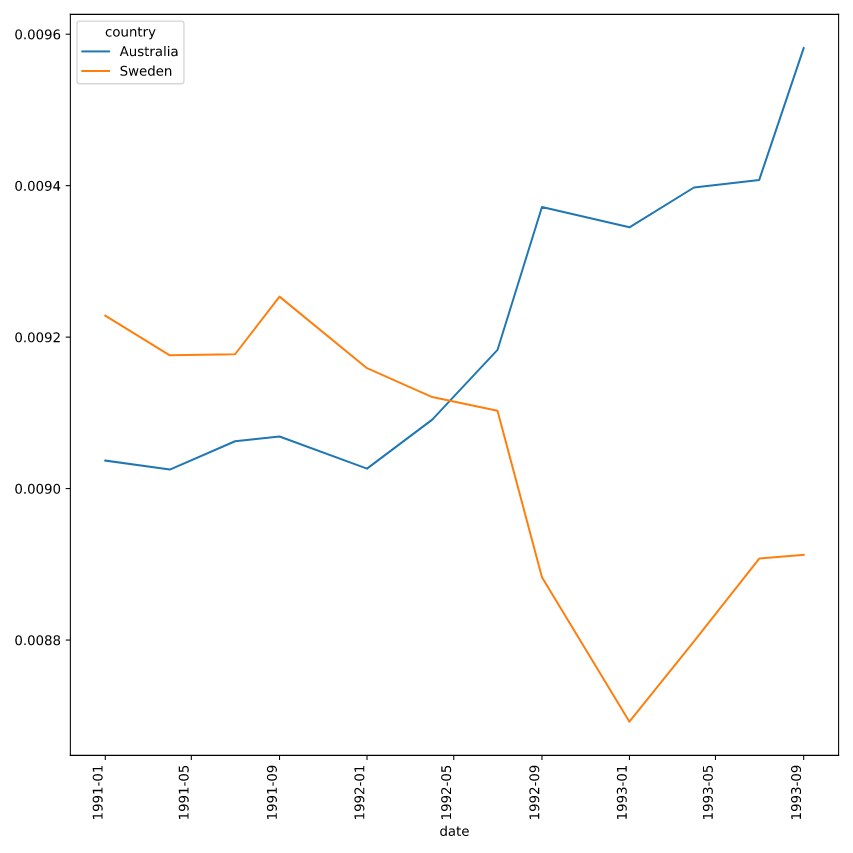

**Select the right .melt() arguments**

You are given a table named inflation. Chose the option to get the same output as the table below.

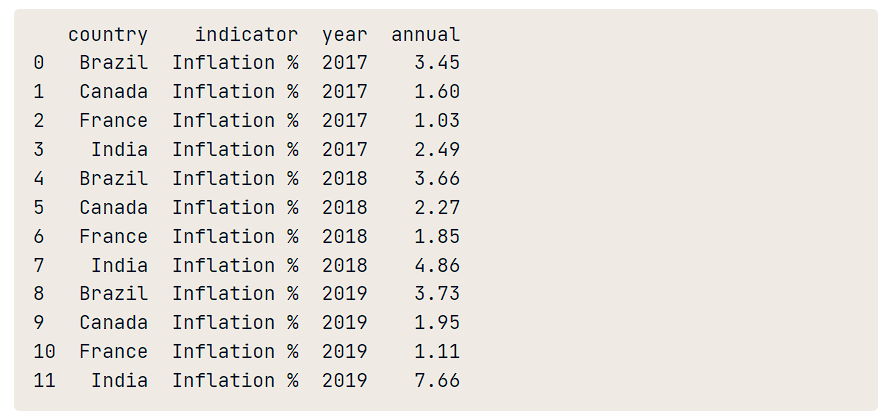

> You identified the correct values to pass to the id_vars argument. These columns are not unpivoted. Finally, the other arguments set the name for the year and value columns.

> `inflation.melt(id_vars = ['country','indicator'], var_name = 'year', value_name = 'annual')`

**Using .melt() to reshape government data**

The US Bureau of Labor Statistics (BLS) often provides data series in an easy-to-read format - it has a separate column for each month, and each year is a different row. Unfortunately, this wide format makes it difficult to plot this information over time. In this exercise, you will reshape a table of US unemployment rate data from the BLS into a form you can plot using .melt(). You will need to add a date column to the table and sort by it to plot the data correctly.

The unemployment rate data has been loaded for you in a table called ur_wide. You are encouraged to view the table in the IPython shell before beginning the exercise.

- Use .melt() to unpivot all of the columns of ur_wide except year and ensure that the columns with the months and values are named month and unempl_rate, respectively. Save the result as ur_tall.
- Add a column to ur_tall named date which combines the year and month columns as year-month format into a larger string, and converts it to a date data type.
- Sort ur_tall by date and save as ur_sorted.
- Using ur_sorted, plot unempl_rate on the y-axis and date on the x-axis.

In [ ]:
# Unpivot everything besides the year column
ur_tall = ur_wide.melt(id_vars = ['year'], var_name = 'month', 
                       value_name = 'unempl_rate')

# Create a date column using the month and year columns of ur_tall
ur_tall['date'] = pd.to_datetime(ur_tall['month'] + '-' + ur_tall['year'])

# Sort ur_tall by date in ascending order
ur_sorted = ur_tall.sort_values('date')

# Plot the unempl_rate by date
ur_sorted.plot(x = 'date', y = 'unempl_rate')
plt.show()

> The plot shows a steady decrease in the unemployment rate with an increase near the end. This increase is likely the effect of the COVID-19 pandemic and its impact on shutting down most of the US economy. In general, data is often provided (especially by governments) in a format that is easily read by people but not by machines. The .melt() method is a handy tool for reshaping data into a useful form.
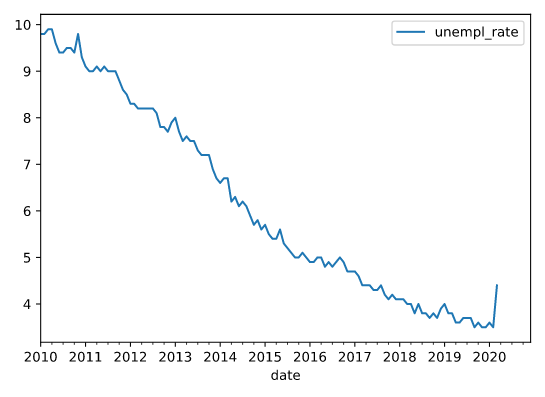

**Using .melt() for stocks vs bond performance**

It is widespread knowledge that the price of bonds is inversely related to the price of stocks. In this last exercise, you'll review many of the topics in this chapter to confirm this. You have been given a table of percent change of the US 10-year treasury bond price. It is in a wide format where there is a separate column for each year. You will need to use the .melt() method to reshape this table.

Additionally, you will use the .query() method to filter out unneeded data. You will merge this table with a table of the percent change of the Dow Jones Industrial stock index price. Finally, you will plot data.

The tables ten_yr and dji have been loaded for you.

- Use .melt() on ten_yr to unpivot everything except the metric column, setting var_name='date' and value_name='close'. Save the result to bond_perc.
- Using the .query() method, select only those rows were metric equals 'close', and save to bond_perc_close.
- Use merge_ordered() to merge dji (left table) and bond_perc_close on date with an inner join, and set suffixes equal to ('_dow', '_bond'). Save the result to dow_bond.
- Using dow_bond, plot only the Dow and bond values.

In [ ]:
# Use melt on ten_yr, unpivot everything besides the metric column
bond_perc = ten_yr.melt(id_vars = 'metric', var_name = 'date', value_name = 'close')

# Use query on bond_perc to select only the rows where metric=close
bond_perc_close = bond_perc.query('metric == "close"')

# Merge (ordered) dji and bond_perc_close on date with an inner join
dow_bond = pd.merge_ordered(dji, bond_perc_close, on = 'date', 
                            suffixes = ('_dow', '_bond'), how = 'inner')

# Plot only the close_dow and close_bond columns
dow_bond.plot(y = ['close_dow', 'close_bond'], x = 'date', rot = 90)
plt.show()

> The plot confirms that the bond and stock prices are inversely correlated. Often as the price of stocks increases, the price for bonds decreases.
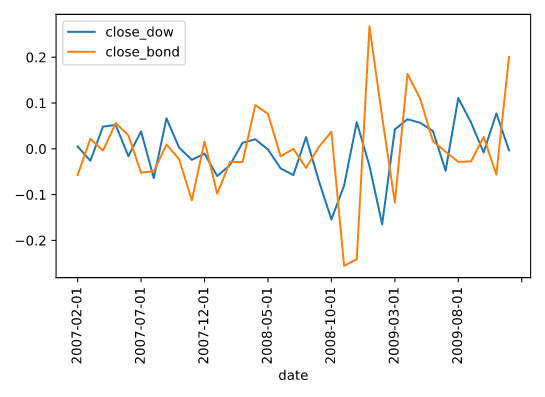